### 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피쳐 : Length, Height, Width
- 타겟 : Weight
- [조건]
    * 특성 추가 => degree = 5 로 설정
    * 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
perch = pd.read_csv('../data/perch3.csv')
perch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


[2] 데이터 확인 <hr>

In [29]:
targetSR = perch[perch.columns[0]]
featureDF=perch[perch.columns[1:]]

print(f'Feature => {featureDF.shape}, Target => {targetSR.shape}')

Feature => (56, 3), Target => (56,)


[2-2] 데이터 분포 확인

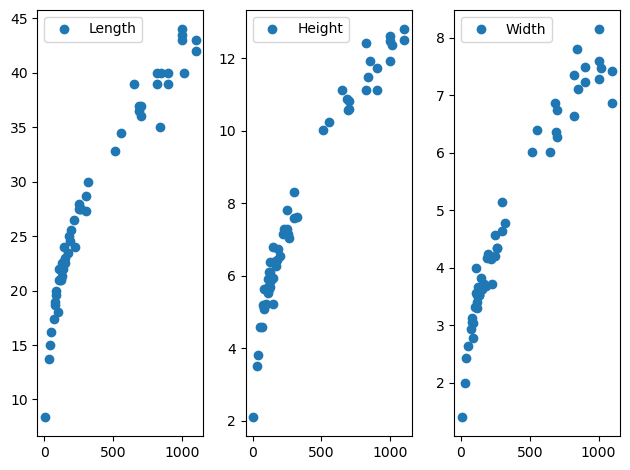

In [30]:
# Feature & Target 관계
for nIdx in range(1,4):
    col_name=featureDF.columns[nIdx-1]
    plt.subplot(1,3,nIdx)
    plt.plot(targetSR, featureDF[col_name], 'o', label=col_name)
    plt.legend()
plt.tight_layout()
plt.show()

[3] 데이터 가공 <hr>
- 특성 추가
- 특성 스케일링

[3-1] 특성 추가

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(featureDF)
poly_feature = poly.transform(featureDF)

In [32]:
print(f'특성추가 => {poly_feature.shape}\n{poly.feature_names_in_} => {poly.get_feature_names_out()}')

특성추가 => (56, 55)
['Length' 'Height' 'Width'] => ['Length' 'Height' 'Width' 'Length^2' 'Length Height' 'Length Width'
 'Height^2' 'Height Width' 'Width^2' 'Length^3' 'Length^2 Height'
 'Length^2 Width' 'Length Height^2' 'Length Height Width' 'Length Width^2'
 'Height^3' 'Height^2 Width' 'Height Width^2' 'Width^3' 'Length^4'
 'Length^3 Height' 'Length^3 Width' 'Length^2 Height^2'
 'Length^2 Height Width' 'Length^2 Width^2' 'Length Height^3'
 'Length Height^2 Width' 'Length Height Width^2' 'Length Width^3'
 'Height^4' 'Height^3 Width' 'Height^2 Width^2' 'Height Width^3' 'Width^4'
 'Length^5' 'Length^4 Height' 'Length^4 Width' 'Length^3 Height^2'
 'Length^3 Height Width' 'Length^3 Width^2' 'Length^2 Height^3'
 'Length^2 Height^2 Width' 'Length^2 Height Width^2' 'Length^2 Width^3'
 'Length Height^4' 'Length Height^3 Width' 'Length Height^2 Width^2'
 'Length Height Width^3' 'Length Width^4' 'Height^5' 'Height^4 Width'
 'Height^3 Width^2' 'Height^2 Width^3' 'Height Width^4' 'Width^5']


[3-2] 피쳐 스케일링

In [33]:
## 훈련용& 테스트용 분리

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(poly_feature, targetSR, random_state=108)

In [36]:
print(f'Train => {X_train.shape}, {y_train.shape} Test => {X_test.shape}, {y_test.shape}')

Train => (42, 55), (42,) Test => (14, 55), (14,)


- 스케일링 진행

In [37]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [38]:
scaled_X_train=std_scaler.transform(X_train)
scaled_X_test=std_scaler.transform(X_test)

[4] 학습 진행 => 회귀

In [39]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(scaled_X_train,y_train)

LinearRegression()

In [40]:
train_score = lr_model.score(scaled_X_train,y_train)
test_score = lr_model.score(scaled_X_test,y_test)

print(f'Train score => {train_score} Test score => {test_score}')

Train score => 1.0 Test score => -22509.877213131535


### 규제 : 가중치 값을 조절해서 과대적합 문제 해결
- Ridge : 모든 피쳐에 가중치를 0에 가깝게 조절
- Lasso : 특정 피쳐의 가중치를 0으로 해서 차원 축소 부여
- [규제 1] Ridge

In [41]:
from sklearn.linear_model import Ridge

In [42]:
ridge_model = Ridge()
ridge_model.fit(scaled_X_train,y_train)

Ridge()

In [43]:
train_score = ridge_model.score(scaled_X_train,y_train)
test_score = ridge_model.score(scaled_X_test,y_test)

print(f'Train score => {train_score} Test score => {test_score}')

Train score => 0.9876200595077226 Test score => 0.9884997674750157


In [45]:
# 모델 파라미터
print(ridge_model.n_iter_, ridge_model.coef_, ridge_model.intercept_)

None [ 10.65604822   3.50926902   7.31477371  17.29578511  15.17446263
  17.82201962  13.29598542  13.72880792  17.76289745  16.08195819
  16.23561029  16.78898605  16.30673579  14.96594624  16.85728159
  16.11084117  12.96822748  13.18645285  16.64607894   9.12842939
  10.90149219   8.87385825  12.54262721   8.77443127   8.10203056
  13.89754157   8.45511197   6.21367172   7.14015041  14.8276814
   7.78969182   4.03502868   3.56973217   6.27052677  -1.7170244
   1.38476232  -3.45525063   4.40382644  -2.10665833  -5.55372024
   7.19845546  -0.92617073  -5.89906214  -7.6984933    9.63247123
  -0.03416969  -6.48336757  -9.65509824  -9.61861186  11.57841494
   0.45625148  -7.40513528 -11.90758676 -13.08881552 -11.09613218] 375.8452380952381


In [47]:
# ====> 최적의 규제 강도 설정 값 찾기
alphas=[0.1,1.0, 10.0, 20., 30.]
ridge_score=[[], []]

for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(scaled_X_train,y_train)
    train_score = ridge_model.score(scaled_X_train,y_train)
    test_score = ridge_model.score(scaled_X_test,y_test)
    
    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)



In [50]:
# 테스트 점수가 가장 높은 알파
best_alphas = alphas[ridge_score[1].index(max(ridge_score[1]))]
best_alphas

20.0

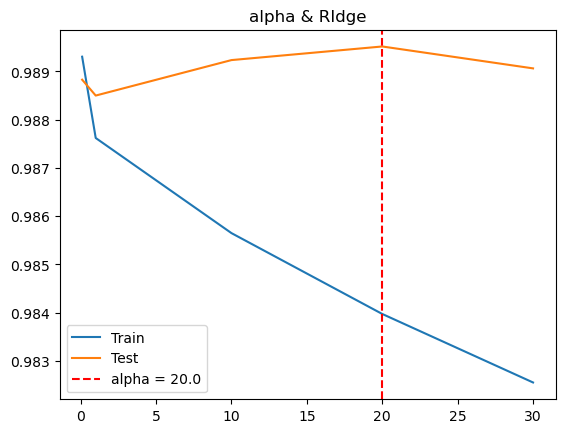

In [54]:
# 학습 및 테스트 점수 기반 시각화
import matplotlib.pyplot as plt

plt.plot(alphas, ridge_score[0], label='Train')
plt.plot(alphas, ridge_score[1], label='Test')
plt.axvline(best_alphas, linestyle='--', color='red', label=f'alpha = {best_alphas}')
plt.legend()
plt.title('alpha & RIdge')
plt.show()

[규제 2] Lasso

In [55]:
from sklearn.linear_model import Lasso

In [56]:
lasso_model = Lasso()
lasso_model.fit(scaled_X_train,y_train)

C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.126e+02, tolerance: 4.927e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [57]:
train_score = lasso_model.score(scaled_X_train,y_train)
test_score = lasso_model.score(scaled_X_test,y_test)

In [59]:
print(f'Train score => {train_score} Test score => {test_score}')

Train score => 0.9871356048713946 Test score => 0.9883429517816835


In [60]:
# 모델 파라미터
print(lasso_model.n_iter_, lasso_model.coef_, lasso_model.intercept_)

1000 [ 0.          0.          0.         30.36652062 45.22679814 34.71528955
  0.          0.         39.14340343 21.23759932 46.99642204  0.
 52.86747703  0.          0.         38.589189    0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         32.18228483
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.
 -0.        ] 375.845238095238


In [63]:
# ====> 최적의 규제 강도 설정 값 찾기
alphas=[0.1,1.0, 10.0, 20., 30.]
lasso_score=[[], []]

for a in alphas:
    lasso_model = Lasso(alpha=a, max_iter=30000)
    lasso_model.fit(scaled_X_train,y_train)
    train_score = lasso_model.score(scaled_X_train,y_train)
    test_score = lasso_model.score(scaled_X_test,y_test)
    
    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)



In [65]:
best_alphas = alphas[lasso_score[1].index(max(lasso_score[1]))]
best_alphas

1.0

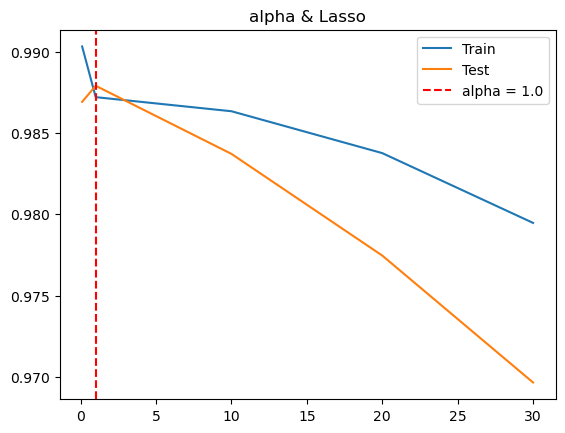

In [66]:
# 학습 및 테스트 점수 기반 시각화

plt.plot(alphas, lasso_score[0], label='Train')
plt.plot(alphas, lasso_score[1], label='Test')
plt.axvline(best_alphas, linestyle='--', color='red', label=f'alpha = {best_alphas}')
plt.legend()
plt.title('alpha & Lasso')
plt.show()

In [67]:
print(nope)

NameError: name 'nope' is not defined